In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np
import seaborn as sns
import scipy.stats as sps

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

## Load data

### 1. Violence Crime Data

In [2]:
# Read data
crime = pd.read_csv('borough_level_crime.csv')

# Wrangle data
crime2017 = crime.loc[:, ['Borough', 'Major Category', 
                          '201701', '201702', '201703', '201704', 
                          '201705', '201706', '201707', '201708', 
                          '201709', '201710', '201711', '201712']]
crime2017['crime'] = crime2017['201701'] + crime2017['201702'] + crime2017['201702'] + crime2017['201703'] + crime2017['201704'] + crime2017['201705'] + crime2017['201706'] + crime2017['201707']+ crime2017['201708'] + crime2017['201709'] + crime2017['201710'] + crime2017['201711'] + crime2017['201712']

# Tidy up
to_drop = ['201701', '201702', '201703', '201704', 
           '201705', '201706', '201707', '201708', 
           '201709', '201710', '201711', '201712']
crime2017.drop(columns=to_drop, inplace=True)

crime2017

,Borough,Major Category,crime
0,Barking and Dagenham,Burglary,1353
1,Barking and Dagenham,Burglary,751
2,Barking and Dagenham,Criminal Damage,455
3,Barking and Dagenham,Criminal Damage,824
4,Barking and Dagenham,Criminal Damage,117
...,...,...,...
1051,Westminster,Violence Against the Person,4651
1052,Westminster,Violence Against the Person,10
1053,Westminster,Violence Against the Person,381
1054,Westminster,Violence Against the Person,923


In [3]:
#group by Borough and crime categrate
crime_borough_type = crime2017.groupby(['Borough', 'Major Category'])[['crime']].sum()

In [4]:
crime_borough_type

crime
Borough                Major Category                    
Barking and Dagenham   Burglary                      2104
                       Criminal Damage               1922
                       Drugs                          831
                       Fraud or Forgery                30
                       Other Notifiable Offences      416
                       Robbery                        929
                       Sexual Offences                516
                       Theft and Handling            6567
                       Violence Against the Person   6771
Barnet                 Burglary                      4357
                       Criminal Damage               2302
                       Drugs                          851
                       Fraud or Forgery                56
                       Other Notifiable Offences      522
                       Robbery                        689
                       Sexual Offences                677
                       Theft and Handling           11001
                       Violence Against the Person   8589
Bexley                 Burglary                      1743
                       Criminal Damage               1937
                       Drugs                          552
                       Fraud or Forgery                17
                       Other Notifiable Offences      406
                       Robbery                        311
                       Sexual Offences                448
                       Theft and Handling            5166
                       Violence Against the Person   5389
Brent                  Burglary                      3636
                       Criminal Damage               2442
                       Drugs                         1843
                       Fraud or Forgery                61
                       Other Notifiable Offences      627
                       Robbery                       1266
                       Sexual Offences                740
                       Theft and Handling           10546
                       Violence Against the Person  10730
Bromley                Burglary                      3436
                       Criminal Damage               2470
                       Drugs                          690
                       Fraud or Forgery                43
                       Other Notifiable Offences      433
                       Robbery                        666
                       Sexual Offences                556
                       Theft and Handling            8395
                       Violence Against the Person   7943
Camden                 Burglary                      3810
                       Criminal Damage               2016
                       Drugs                         1431
                       Fraud or Forgery                60
                       Other Notifiable Offences      458
                       Robbery                       2119
                       Sexual Offences                811
                       Theft and Handling           20741
                       Violence Against the Person   9076
Croydon                Burglary                      3407
                       Criminal Damage               3393
                       Drugs                         1818
                       Fraud or Forgery                51
                       Other Notifiable Offences      741
                       Robbery                       1291
                       Sexual Offences                943
                       Theft and Handling            9591
                       Violence Against the Person  11665
Ealing                 Burglary                      3328
                       Criminal Damage               2518
                       Drugs                         1496
                       Fraud or Forgery                66
                       Other Notifiable Offences  

In [5]:
#group by crime categrate
crime_type = crime2017.groupby(['Major Category'])[['crime']].sum()

In [6]:
crime_type

,crime
Major Category,
Burglary,96913
Criminal Damage,68791
Drugs,39932
Fraud or Forgery,1565
Other Notifiable Offences,18080
Robbery,33437
Sexual Offences,21149
Theft and Handling,338056
Violence Against the Person,267216


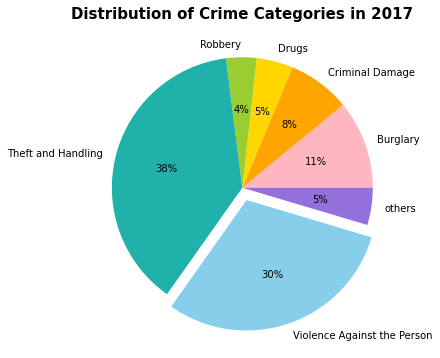

In [7]:
# Pie chart
labels = ['Burglary','Criminal Damage', 'Drugs', 'Robbery', 'Theft and Handling', 'Violence Against the Person', 'others']
x = ['96913', '68791', '39932', '33437', '338056', '267216', '40792']  
explode = (0, 0, 0, 0, 0, 0.1, 0)  
colors = ['lightpink', 'orange', 'gold', 'yellowgreen', 'lightseagreen', 'skyblue', 'mediumpurple']

plt.figure(figsize=(8, 6))
plt.pie(x,labels=labels,colors=colors, explode=explode, autopct='%1.0f%%')
plt.title("Distribution of Crime Categories in 2017", weight='bold', size=15)
#plt.legend(loc='lower right')
#plt.legend('left')
plt.show() 

In [8]:
crime_number = crime2017.loc[crime2017['Major Category']=='Violence Against the Person']
crime_number = crime2017.groupby(['Borough'])[['crime']].sum()

In [9]:
crime_number

,crime
Borough,
Barking and Dagenham,20086
Barnet,29044
Bexley,15969
Brent,31891
Bromley,24632
Camden,40522
Croydon,32900
Ealing,30493
Enfield,27083


In [10]:
# Read data
crime1 = pd.read_csv('borough_level_crime.csv')

# Wrangle data
crime_2017 = crime1.loc[:, ['Major Category','Minor Category',
                            '201701', '201702', '201703', '201704',
                            '201705', '201706', '201707', '201708',  
                            '201709', '201710', '201711', '201712']]
crime_2017['mini'] = crime_2017['201701'] + crime_2017['201702'] + crime_2017['201702'] + crime_2017['201703'] + crime_2017['201704'] + crime_2017['201705'] + crime_2017['201706'] + crime_2017['201707']+ crime_2017['201708'] + crime_2017['201709'] + crime_2017['201710'] + crime_2017['201711'] + crime_2017['201712']

# Tidy up
to_drop = ['201701', '201702', '201703', '201704', 
           '201705', '201706', '201707', '201708', 
           '201709', '201710', '201711', '201712']
crime_2017.drop(columns=to_drop, inplace=True)

In [11]:
crime_2017

,Major Category,Minor Category,mini
0,Burglary,Burglary in a Dwelling,1353
1,Burglary,Burglary in Other Buildings,751
2,Criminal Damage,Criminal Damage To Dwelling,455
3,Criminal Damage,Criminal Damage To Motor Vehicle,824
4,Criminal Damage,Criminal Damage To Other Building,117
...,...,...,...
1051,Violence Against the Person,Harassment,4651
1052,Violence Against the Person,Murder,10
1053,Violence Against the Person,Offensive Weapon,381
1054,Violence Against the Person,Other violence,923


In [12]:
minor = crime_2017[crime_2017['Major Category'].str.contains("Violence Against the Person")]
minor_number = minor.groupby(['Minor Category'])[['mini']].sum()

In [13]:
minor_number = minor_number.rename(columns={'Minor Category':'violent crime', 'mini':'count_2017'})

Text(0.5, 1.0, 'Number of different tpyes of violent crime in London (2017)')

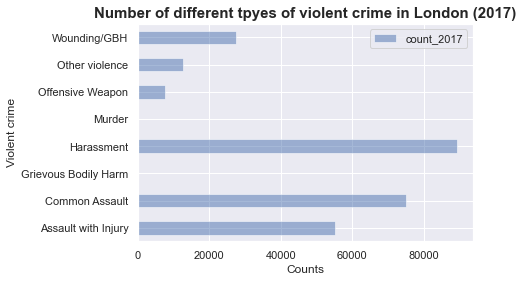

In [14]:
sns.set(style="darkgrid")
minor_number.plot.barh(stacked=True, 
                       alpha=0.5, 
                       rot=0)
plt.xlabel('Counts')
plt.ylabel('Violent crime')
plt.title('Number of different tpyes of violent crime in London (2017)', weight='bold', size=15)

### 2. Alcohol Outlets Data

In [15]:
# Read data
alcohol = pd.read_excel('licensed_premises.xlsx',
                        '2017',
                        usecols = ['Licensing authority','Premises licences selling alcohol'])

# Wrangle data
alcohol_number = alcohol.iloc[0:33,:]

# Tidy up
outlet_number = alcohol_number.drop([0,1,7],axis=0)
outlet_number['Premises licences selling alcohol'] = outlet_number['Premises licences selling alcohol'].astype(float, errors = 'raise')

outlet_number

,Licensing authority,Premises licences selling alcohol
2,Bexley,483.0000
3,Brent,768.0000
4,Bromley,554.0000
5,Camden,"1,676.0000"
6,City of London,865.0000
8,Ealing,836.0000
9,Enfield,710.0000
10,Greenwich,719.0000
11,Hackney,"1,307.0000"
12,Hammersmith and Fulham,804.0000


### 3. Education Data

In [16]:
# Read data
education = pd.read_excel('Qualifications-of-working-age-NVQ.xlsx',
                          '2017',
                          header=[1])

# Wrangle data
education = education.rename(columns={'Unnamed: 0':'code', 'Unnamed: 1':'area', 'percent':'%degree'})
education1 = education.iloc[1:33,0:5]

# Tidy up
to_drop = ['number','denominator']
education1.drop(columns=to_drop, inplace=True)

education1

,code,area,%degree
1,E09000001,City of London,87.2000
2,E09000002,Barking and Dagenham,30.7000
3,E09000003,Barnet,53.8000
4,E09000004,Bexley,37.1000
5,E09000005,Brent,39.6000
6,E09000006,Bromley,46.9000
7,E09000007,Camden,59.9000
8,E09000008,Croydon,47.2000
9,E09000009,Ealing,49.4000
10,E09000010,Enfield,36.1000


### 4. Mental Health Data

In [17]:
# Read data
mental_health = pd.read_excel('mental-health-common-problems-borough.xls',
                              'Mental Health Problem Rates',
                              header=[1])

# Wrangle data
mental_health1 = mental_health.iloc[1:33,0:9]
mental_health1['per_mental'] = mental_health1['Any neurotic disorder'] + mental_health1['All phobias'] + mental_health1['Depressive episode'] + mental_health1['Generalised anxiety disorder'] + mental_health1['Mixed anxiety depression'] + mental_health1['Obsessive compulsive disorder'] + mental_health1['Panic disorder']

# Tidy up
to_drop = ['Any neurotic disorder','All phobias','Depressive episode','Generalised anxiety disorder','Mixed anxiety depression','Obsessive compulsive disorder','Panic disorder']
mental_health1.drop(columns=to_drop, inplace=True)


mental_health1

,Code,Area,per_mental
1,00AA,City of London,422.3377
2,00AB,Barking and Dagenham,390.3818
3,00AC,Barnet,368.1928
4,00AD,Bexley,342.4695
5,00AE,Brent,400.7197
6,00AF,Bromley,347.4931
7,00AG,Camden,453.0845
8,00AH,Croydon,379.8520
9,00AJ,Ealing,383.9524
10,00AK,Enfield,375.8268


### 5. Unemployment Rate

In [18]:
# Read data
unemploy = pd.read_csv('Unemployment rate by London borough (2015-18 and 2018-21 Q1).csv',
                       header=[2])

# Wrangle data
unemploy['Apr 2015 to Mar 2018'] = unemploy['Apr 2015 to Mar 2018'].str.strip('%').astype(float)
unemploy1 = unemploy.iloc[0:33,0:3]

# Tidy up
unemploy1 = unemploy1.rename(columns={'Apr 2015 to Mar 2018':'%unemploy'})
unemploy2 = unemploy1.drop(index=[6])


unemploy2

,Geography name,Geography code,%unemploy
0,Barking and Dagenham,E09000002,9.0000
1,Barnet,E09000003,4.8000
2,Bexley,E09000004,4.7000
3,Brent,E09000005,7.3000
4,Bromley,E09000006,4.7000
5,Camden,E09000007,5.4000
7,Croydon,E09000008,6.0000
8,Ealing,E09000009,5.5000
9,Enfield,E09000010,5.8000
10,Greenwich,E09000011,6.6000


### 6. Income Deprivation data

In [19]:
# Read data
deprivation = pd.read_csv('median income deprivation ranking.csv',
                          header=[2])

# Wrangle data
deprivation1 = deprivation.iloc[0:33,0:4]

# Tidy up
to_drop = ['Median income deprivation rank']
deprivation1.drop(columns=to_drop, inplace=True)

deprivation1 = deprivation1.rename(columns={'Relative to London':'income_ratio'})

deprivation1

,ONS-code,London boroughs,income_ratio
0,E09000001,City of London,0.4200
1,E09000027,Richmond upon Thames,0.5000
2,E09000006,Bromley,0.5800
3,E09000021,Kingston upon Thames,0.5900
4,E09000029,Sutton,0.6300
5,E09000024,Merton,0.6700
6,E09000016,Havering,0.6900
7,E09000004,Bexley,0.7000
8,E09000020,Kensington and Chelsea,0.7000
9,E09000003,Barnet,0.7700


### 7. Population data

In [20]:
# Read data
population = pd.read_excel('population.xls',
                           'MYE4',
                           header=[7])

# Wrangle data
population1 = population.iloc[214:247,0:7]

# Tidy up
to_drop = ['Mid-2020','Mid-2019','Mid-2018']
population1.drop(columns=to_drop, inplace=True)

population1

,Code,Name,Geography,Mid-2017
214,E09000007,Camden,London Borough,253361
215,E09000001,City of London,London Borough,7654
216,E09000012,Hackney,London Borough,275929
217,E09000013,Hammersmith and Fulham,London Borough,182998
218,E09000014,Haringey,London Borough,271224
219,E09000019,Islington,London Borough,235000
220,E09000020,Kensington and Chelsea,London Borough,155741
221,E09000022,Lambeth,London Borough,324048
222,E09000023,Lewisham,London Borough,301307
223,E09000025,Newham,London Borough,347996


## Prepare data for analysis

In [21]:
#calculate violent crime
crime_rate = pd.merge(crime_number, population1, left_on='Borough', right_on='Name', how='inner')

crime_rate['crime_rate1'] = crime_rate['crime'].div(crime_rate['Mid-2017'].values,axis=0)
crime_rate['crime_rate'] = crime_rate['crime_rate1'] * 100

to_drop = ['Geography','crime','Mid-2017','crime_rate1']
crime_rate.drop(columns=to_drop, inplace=True)


crime_rate

,Code,Name,crime_rate
0,E09000002,Barking and Dagenham,9.5325
1,E09000003,Barnet,7.4894
2,E09000004,Bexley,6.4882
3,E09000005,Brent,9.6903
4,E09000006,Bromley,7.4780
5,E09000007,Camden,15.9938
6,E09000008,Croydon,8.5491
7,E09000009,Ealing,8.8969
8,E09000010,Enfield,8.1402
9,E09000011,Greenwich,9.7073


In [22]:
#calculate alcohol outlets density
alcohol_density = pd.merge(outlet_number, population1, left_on='Licensing authority', right_on='Name', how='inner')

alcohol_density['alcohol_density1'] = alcohol_density['Premises licences selling alcohol'].div(alcohol_density['Mid-2017'].values,axis=0)
alcohol_density['alcohol_density'] = alcohol_density['alcohol_density1'] * 1000

to_drop = ['Licensing authority','Premises licences selling alcohol','Geography','alcohol_density1','Mid-2017']
alcohol_density.drop(columns=to_drop, inplace=True)


alcohol_density

,Code,Name,alcohol_density
0,E09000004,Bexley,1.9624
1,E09000005,Brent,2.3336
2,E09000006,Bromley,1.6819
3,E09000007,Camden,6.6151
4,E09000001,City of London,113.0128
5,E09000009,Ealing,2.4392
6,E09000010,Enfield,2.1340
7,E09000011,Greenwich,2.5420
8,E09000012,Hackney,4.7367
9,E09000013,Hammersmith and Fulham,4.3935


## Desceiption data

### 1. Dependent Variable - violent crime

In [23]:
crime_rate.describe()

,crime_rate
count,32.0000
mean,10.1572
std,3.6958
min,6.0387
25%,7.8246
50%,9.2628
75%,11.5681
max,24.9473


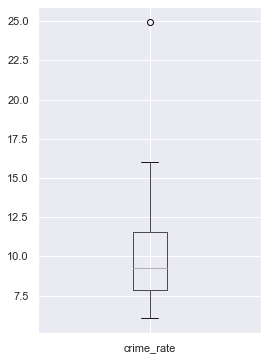

In [24]:
plt.figure(figsize=(4,6))
boxplot = crime_rate.boxplot(column=['crime_rate'])

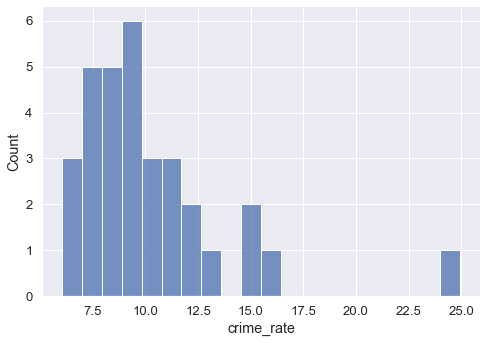

In [25]:
#crime_dis = sns.load_dataset("crime_rate")
#sns.displot(crime_dis, x="crime_rate")
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data = crime_rate,
            x="crime_rate",
            kind="hist",
            aspect=1.4,
            bins=20)

In [26]:
Q1 = crime_rate['crime_rate'].quantile(0.25)
Q3 = crime_rate['crime_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q1 + 1.5 * IQR

In [27]:
# Dropping the outliers
outliers_15_low = (crime_rate['crime_rate'] < lower_lim)
outliers_15_up = (crime_rate['crime_rate'] > upper_lim)
#len(crime_rate['crime_rate']) - (len(crime_rate['crime_rate'][outliers_15_low] + len(crime_rate['crime_rate'][outliers_15_up])

In [28]:
crime_rate['crime_rate'][outliers_15_low | outliers_15_up]

5                                     15.9938
17                                    14.6685
18                                    14.6936
31                                    24.9473
Name: crime_rate, dtype: float64

In [29]:
# Tidy up
crime_out = crime_rate.drop(index=[5,17,18,31])

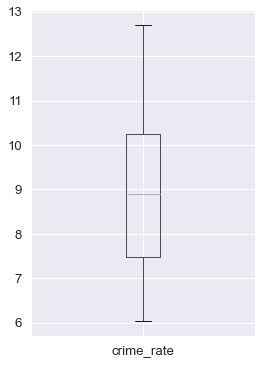

In [30]:
plt.figure(figsize=(4,6))
boxplot = crime_out.boxplot(column=['crime_rate'])

In [31]:
#sns.boxplot(x = crime_out['crime_rate'])
#plt.show()

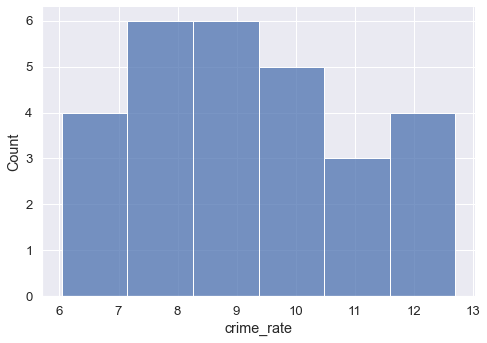

In [32]:
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data = crime_out,
            x="crime_rate",
            kind="hist",
            aspect=1.4,
            bins=6)

### 2. Independent Variable 
####   2.1 alcohol outlets density

In [33]:
alcohol_density.describe()

,alcohol_density
count,30.0000
mean,7.0271
std,20.1546
min,1.6819
25%,2.1481
50%,2.4996
75%,3.9434
max,113.0128


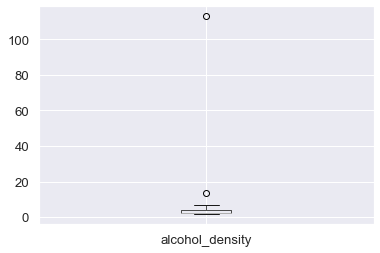

In [34]:
boxplot = alcohol_density.boxplot(column=['alcohol_density'])

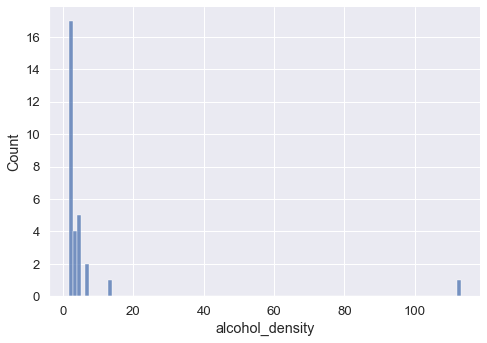

In [35]:
#crime_dis = sns.load_dataset("crime_rate")
#sns.displot(crime_dis, x="crime_rate")
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data = alcohol_density,
            x="alcohol_density",
            kind="hist",
            aspect=1.4,
            bins=100)

In [36]:
Q1 = alcohol_density['alcohol_density'].quantile(0.25)
Q3 = alcohol_density['alcohol_density'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q1 + 1.5 * IQR

In [37]:
# Dropping the outliers
outliers_15_low = (alcohol_density['alcohol_density'] < lower_lim)
outliers_15_up = (alcohol_density['alcohol_density'] > upper_lim)

In [38]:
alcohol_density['alcohol_density'][outliers_15_low | outliers_15_up]

3                                      6.6151
4                                    113.0128
15                                     4.9574
16                                     6.2732
29                                    13.7502
Name: alcohol_density, dtype: float64

In [39]:
# Tidy up
alcohol_out = alcohol_density.drop(index=[3,4,15,16,29])

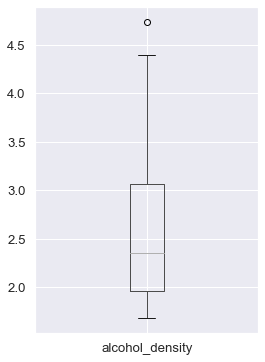

In [40]:
plt.figure(figsize=(4,6))
boxplot = alcohol_out.boxplot(column=['alcohol_density'])

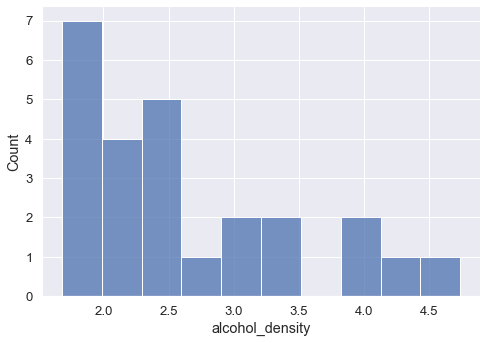

In [41]:
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data = alcohol_out,
            x="alcohol_density",
            kind="hist",
            aspect=1.4,
            bins=10)

#### 2.2 Education

In [42]:
education1.describe()

,%degree
count,32.0000
mean,52.4375
std,12.3208
min,30.0000
25%,44.5000
50%,52.4500
75%,60.3500
max,87.2000


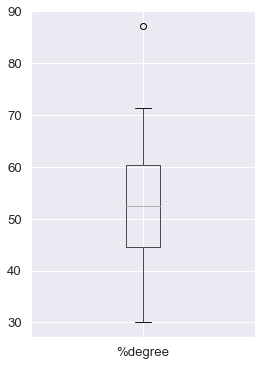

In [43]:
plt.figure(figsize=(4,6))
boxplot = education1.boxplot(column=['%degree'])

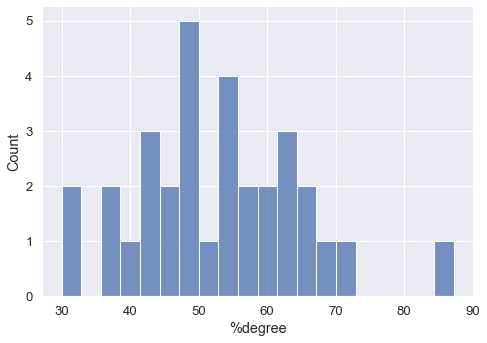

In [44]:
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data = education1,
            x="%degree",
            kind="hist",
            aspect=1.4,
            bins=20)

In [45]:
Q1 = education1['%degree'].quantile(0.25)
Q3 = education1['%degree'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q1 + 1.5 * IQR

In [46]:
# Dropping the outliers
outliers_15_low = (education1['%degree'] < lower_lim)
outliers_15_up = (education1['%degree'] > upper_lim)

In [47]:
education1['%degree'][outliers_15_low | outliers_15_up]

1                                     87.2000
32                                    71.3000
Name: %degree, dtype: float64

In [48]:
# Tidy up
education_out = education1.drop(index=[1,32])

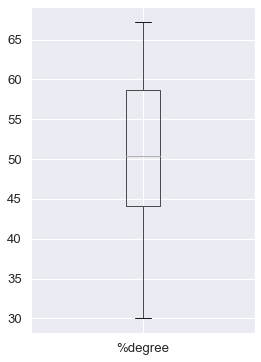

In [49]:
plt.figure(figsize=(4,6))
boxplot = education_out.boxplot(column=['%degree'])

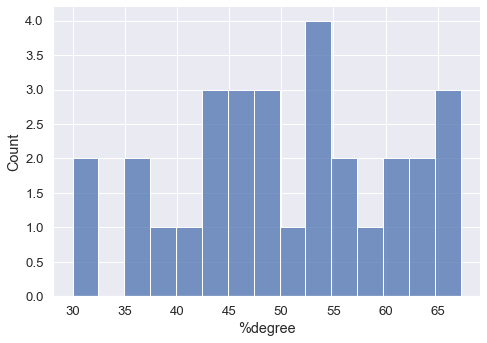

In [50]:
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data = education_out,
            x="%degree",
            kind="hist",
            aspect=1.4,
            bins=15)

#### 2.3 Mental health

In [51]:
mental_health1.describe()

,per_mental
count,32.0000
mean,400.1625
std,42.6066
min,332.9974
25%,366.1556
50%,395.5508
75%,437.1791
max,467.7809


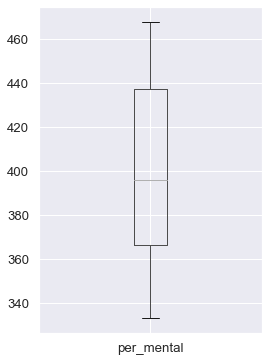

In [52]:
plt.figure(figsize=(4,6))
boxplot = mental_health1.boxplot(column=['per_mental'])

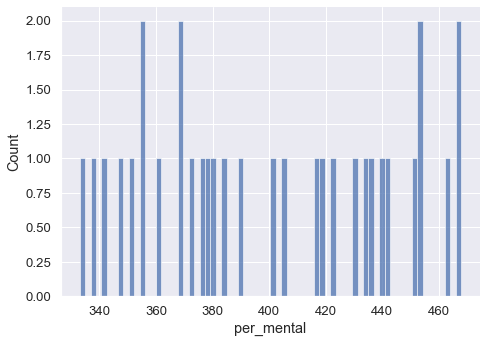

In [53]:
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data = mental_health1,
            x="per_mental",
            kind="hist",
            aspect=1.4,
            bins=70)

In [54]:
Q1 = mental_health1['per_mental'].quantile(0.25)
Q3 = mental_health1['per_mental'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q1 + 1.5 * IQR

In [55]:
# Dropping the outliers
outliers_15_low = (mental_health1['per_mental'] < lower_lim)
outliers_15_up = (mental_health1['per_mental'] > upper_lim)

In [56]:
mental_health1['per_mental'][outliers_15_low | outliers_15_up]

Series([], Name: per_mental, dtype: float64)

#### 2.4 Unemployment

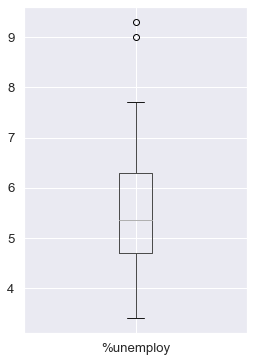

In [57]:
plt.figure(figsize=(4,6))
boxplot = unemploy2.boxplot(column=['%unemploy'])

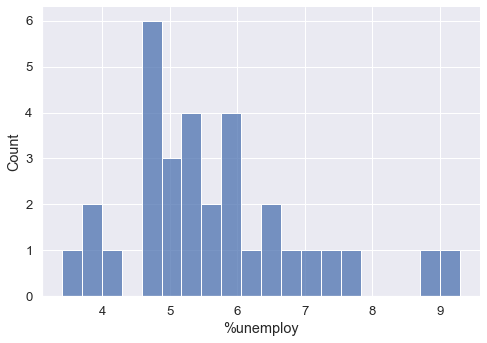

In [58]:
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data = unemploy2,
            x="%unemploy",
            kind="hist",
            aspect=1.4,
            bins=20)

In [59]:
Q1 = unemploy2['%unemploy'].quantile(0.25)
Q3 = unemploy2['%unemploy'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q1 + 1.5 * IQR

In [60]:
# Dropping the outliers
outliers_15_low = (unemploy2['%unemploy'] < lower_lim)
outliers_15_up = (unemploy2['%unemploy'] > upper_lim)

In [61]:
unemploy2['%unemploy'][outliers_15_low | outliers_15_up]

0                                      9.0000
3                                      7.3000
19                                     7.7000
29                                     9.3000
Name: %unemploy, dtype: float64

In [62]:
# Tidy up
unemploy_out = unemploy2.drop(index=[0,3,19,29])

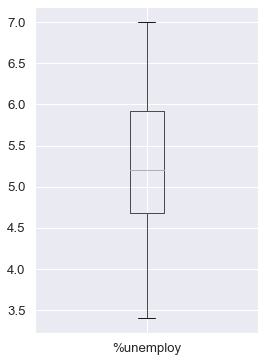

In [63]:
plt.figure(figsize=(4,6))
boxplot = unemploy_out.boxplot(column=['%unemploy'])

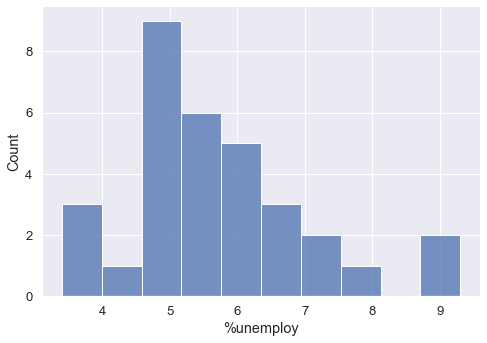

In [64]:
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data = unemploy2,
            x="%unemploy",
            kind="hist",
            aspect=1.4,
            bins=10)

#### 2.5 Income Deprivation

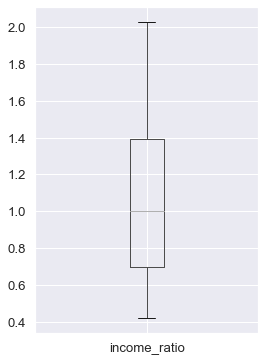

In [65]:
plt.figure(figsize=(4,6))
boxplot = deprivation1.boxplot(column=['income_ratio'])

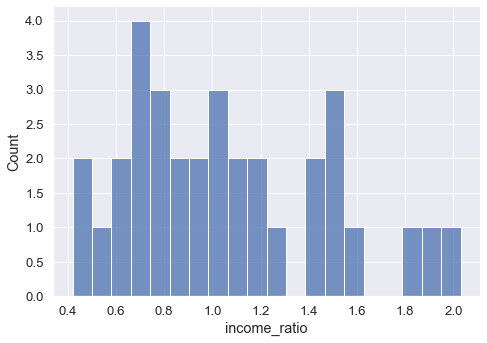

In [66]:
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data = deprivation1,
            x="income_ratio",
            kind="hist",
            aspect=1.4,
            bins=20)

In [67]:
Q1 = deprivation1['income_ratio'].quantile(0.25)
Q3 = deprivation1['income_ratio'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q1 + 1.5 * IQR

In [68]:
# Dropping the outliers
outliers_15_low = (deprivation1['income_ratio'] < lower_lim)
outliers_15_up = (deprivation1['income_ratio'] > upper_lim)

In [69]:
deprivation1['income_ratio'][outliers_15_low | outliers_15_up]

30                                     1.8000
31                                     1.9000
32                                     2.0300
Name: income_ratio, dtype: float64

In [70]:
# Tidy up
deprivation_out = deprivation1.drop(index=[30,31,32])

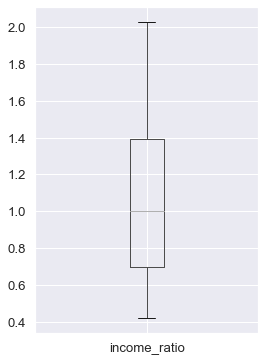

In [71]:
plt.figure(figsize=(4,6))
boxplot = deprivation1.boxplot(column=['income_ratio'])

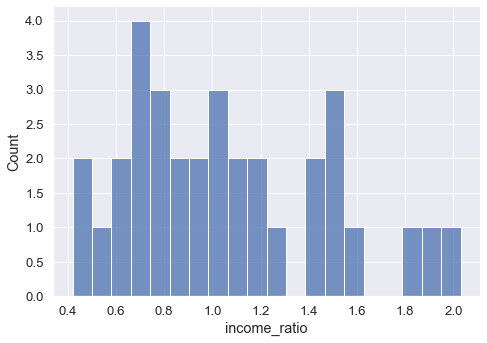

In [72]:
sns.set(style="darkgrid", font_scale=1.2)
sns.displot(data = deprivation1,
            x="income_ratio",
            kind="hist",
            aspect=1.4,
            bins=20)

## Join data

In [73]:
y_x1 = pd.merge(crime_rate, alcohol_density, left_on='Code', right_on='Code', how='inner')
to_drop = ['Name_y']
y_x1.drop(columns=to_drop, inplace=True)


y_x2 = pd.merge(y_x1, education1, left_on='Code', right_on='code', how='inner')
to_drop = ['area','code']
y_x2.drop(columns=to_drop, inplace=True)


y_x3 = pd.merge(y_x2, mental_health1, left_on='Name_x', right_on='Area', how='inner')
to_drop = ['Area','Code_y']
y_x3.drop(columns=to_drop, inplace=True)


y_x4 = pd.merge(y_x3, deprivation1, left_on='Name_x', right_on='London boroughs', how='inner')
to_drop = ['ONS-code','London boroughs']
y_x4.drop(columns=to_drop, inplace=True)


model = pd.merge(y_x4, unemploy2, left_on='Code_x', right_on='Geography code', how='inner')
to_drop = ['Geography name','Geography code']
model.drop(columns=to_drop, inplace=True)

# Rename the column
model = model.rename(columns={'Code_x':'code', 'Name_x: 1':'borough', '%degree':'degree_per', '%unemploy':'unemploy_rate', 'per_mental':'mental_per'})

In [74]:
model

,code,Name_x,crime_rate,alcohol_density,degree_per,mental_per,income_ratio,unemploy_rate
0,E09000004,Bexley,6.4882,1.9624,37.1000,342.4695,0.7000,4.7000
1,E09000005,Brent,9.6903,2.3336,39.6000,400.7197,1.1100,7.3000
2,E09000006,Bromley,7.4780,1.6819,46.9000,347.4931,0.5800,4.7000
3,E09000007,Camden,15.9938,6.6151,59.9000,453.0845,1.1800,5.4000
4,E09000009,Ealing,8.8969,2.4392,49.4000,383.9524,1.0000,5.5000
5,E09000010,Enfield,8.1402,2.1340,36.1000,375.8268,1.4900,5.8000
6,E09000011,Greenwich,9.7073,2.5420,53.5000,417.5483,1.2600,6.6000
7,E09000012,Hackney,12.4521,4.7367,59.3000,467.7809,1.8000,5.2000
8,E09000013,Hammersmith and Fulham,12.7072,4.3935,65.6000,452.2403,1.0300,3.7000
9,E09000014,Haringey,12.0089,2.3523,54.0000,442.1118,1.4300,5.6000


In [75]:
model.describe()

,crime_rate,alcohol_density,degree_per,mental_per,income_ratio,unemploy_rate
count,28.0000,28.0000,28.0000,28.0000,28.0000,28.0000
mean,9.8040,3.0018,52.1107,401.5870,1.0711,5.4821
std,2.6604,1.3360,10.5280,44.8025,0.4021,1.2982
min,6.0387,1.6819,30.0000,332.9974,0.5000,3.4000
25%,7.8217,2.0911,44.5000,360.0170,0.7000,4.6750
50%,9.3417,2.4483,52.4500,402.5661,1.0150,5.2500
75%,11.5681,3.4780,60.3500,440.1814,1.4000,6.0500
max,15.9938,6.6151,71.3000,467.7809,2.0300,9.3000


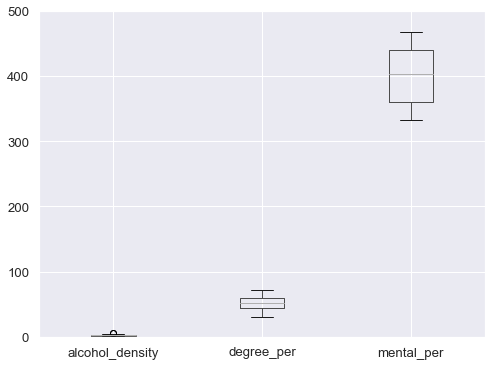

In [76]:
plt.figure(figsize=(8,6))
plt.ylim(0, 500)
boxplot = model.boxplot(column=['alcohol_density',
                                'degree_per',
                                'mental_per'])

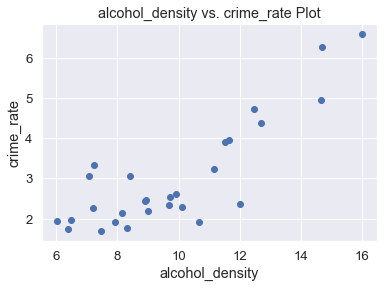

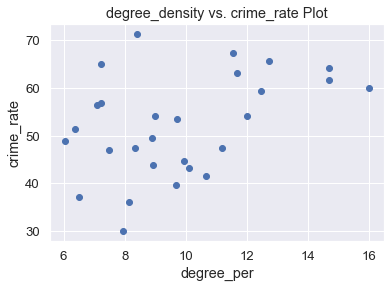

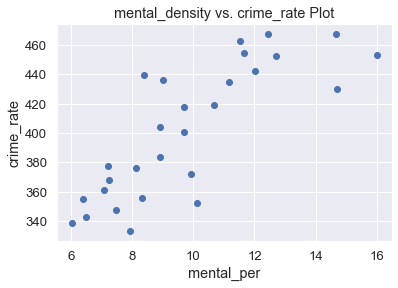

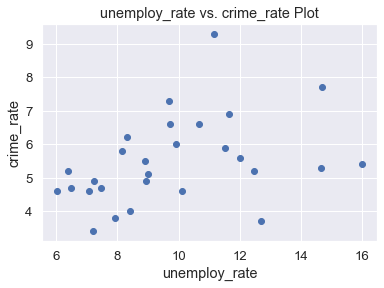

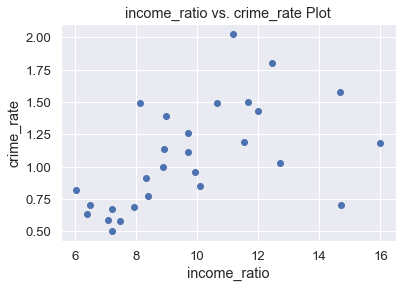

In [77]:
# scatter plot 
plt.scatter(model.crime_rate, model.alcohol_density)
# adding title and labels
plt.xlabel('alcohol_density')
plt.ylabel('crime_rate')
plt.title('alcohol_density vs. crime_rate Plot')
plt.show()


plt.scatter(model.crime_rate, model.degree_per)
# adding title and labels
plt.xlabel('degree_per')
plt.ylabel('crime_rate')
plt.title('degree_density vs. crime_rate Plot')
plt.show()


# scatter plot 
plt.scatter(model.crime_rate, model.mental_per)
# adding title and labels
plt.xlabel('mental_per')
plt.ylabel('crime_rate')
plt.title('mental_density vs. crime_rate Plot')
plt.show()


# scatter plot 
plt.scatter(model.crime_rate, model.unemploy_rate)
# adding title and labels
plt.xlabel('unemploy_rate')
plt.ylabel('crime_rate')
plt.title('unemploy_rate vs. crime_rate Plot')
plt.show()


# scatter plot 
plt.scatter(model.crime_rate, model.income_ratio)
# adding title and labels
plt.xlabel('income_ratio')
plt.ylabel('crime_rate')
plt.title('income_ratio vs. crime_rate Plot')
plt.show()

In [78]:
model

,code,Name_x,crime_rate,alcohol_density,degree_per,mental_per,income_ratio,unemploy_rate
0,E09000004,Bexley,6.4882,1.9624,37.1000,342.4695,0.7000,4.7000
1,E09000005,Brent,9.6903,2.3336,39.6000,400.7197,1.1100,7.3000
2,E09000006,Bromley,7.4780,1.6819,46.9000,347.4931,0.5800,4.7000
3,E09000007,Camden,15.9938,6.6151,59.9000,453.0845,1.1800,5.4000
4,E09000009,Ealing,8.8969,2.4392,49.4000,383.9524,1.0000,5.5000
5,E09000010,Enfield,8.1402,2.1340,36.1000,375.8268,1.4900,5.8000
6,E09000011,Greenwich,9.7073,2.5420,53.5000,417.5483,1.2600,6.6000
7,E09000012,Hackney,12.4521,4.7367,59.3000,467.7809,1.8000,5.2000
8,E09000013,Hammersmith and Fulham,12.7072,4.3935,65.6000,452.2403,1.0300,3.7000
9,E09000014,Haringey,12.0089,2.3523,54.0000,442.1118,1.4300,5.6000


Text(0.5, 1.0, 'Correlation Matrix')

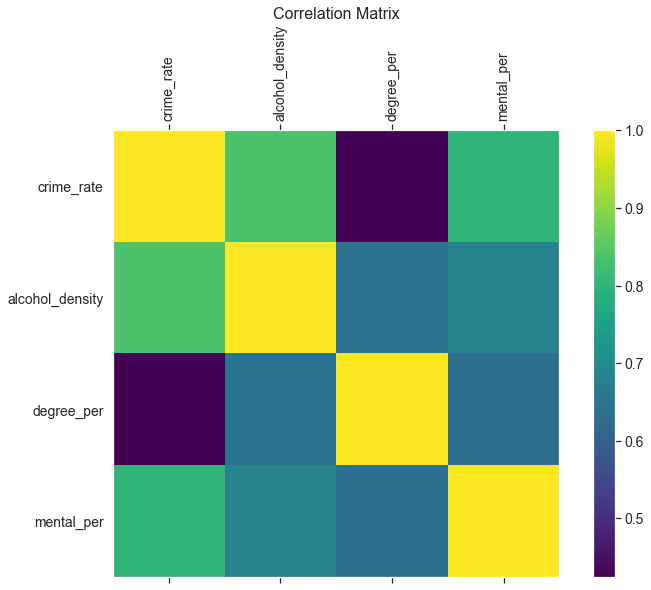

In [79]:
to_drop = ['code','Name_x','income_ratio','unemploy_rate']
model.drop(columns=to_drop, inplace=True)

plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(12, 8))
plt.matshow(model.corr(), fignum=f.number, cmap='viridis')
plt.xticks(range(model.shape[1]), model.columns, fontsize=14, rotation=90)
plt.yticks(range(model.shape[1]), model.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [80]:
model

,crime_rate,alcohol_density,degree_per,mental_per
0,6.4882,1.9624,37.1000,342.4695
1,9.6903,2.3336,39.6000,400.7197
2,7.4780,1.6819,46.9000,347.4931
3,15.9938,6.6151,59.9000,453.0845
4,8.8969,2.4392,49.4000,383.9524
5,8.1402,2.1340,36.1000,375.8268
6,9.7073,2.5420,53.5000,417.5483
7,12.4521,4.7367,59.3000,467.7809
8,12.7072,4.3935,65.6000,452.2403
9,12.0089,2.3523,54.0000,442.1118


In [81]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [82]:
# using VIF to drop highly correlated variables

df_predictors_selected_VIF = drop_column_using_vif_(model.drop('crime_rate', axis=1), thresh=4)
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['alcohol_density', 'degree_per', 'mental_per'], dtype='object')


### Modelling

In [83]:
cols_ind=['alcohol_density', 
          'degree_per',
          'mental_per']
ind_vars = model[cols_ind]

In [84]:
model_1 = sm.OLS(endog=model[['crime_rate']], exog=sm.add_constant(ind_vars)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     58.45
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           3.52e-11
Time:                        13:33:14   Log-Likelihood:                -36.981
No. Observations:                  28   AIC:                             81.96
Df Residuals:                      24   BIC:                             87.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.9808      1.976     -1.508      0.144      -7.059       1.098
alcohol_density     1.3872      0.208      6.685      0.000       0.959       1.815
degree_per         -0.0995      0.025     -3.972      0.001      -0.151      -0.048
mental_per          0.0344      0.006      5.605      0.000       0.022       0.047
==============================================================================
Omnibus:                        1.915   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.384   Jarque-Bera (JB):                1.612
Skew:                           0.563   Prob(JB):                        0.447
Kurtosis:                       2.665   Cond. No.                     4.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### drop a column

In [85]:
#cols_ind=['alcohol_density',
          #'income_ratio']
#ind_vars = model[cols_ind]

In [86]:
#model_2 = sm.OLS(endog=model[['crime_rate']], exog=sm.add_constant(ind_vars)).fit()
#model_2.summary()  ###标准化看看

### check if taking the log of crime rate, alcohol density, degree density and mental ensity gives a better scatter plot

In [87]:
model

,crime_rate,alcohol_density,degree_per,mental_per
0,6.4882,1.9624,37.1000,342.4695
1,9.6903,2.3336,39.6000,400.7197
2,7.4780,1.6819,46.9000,347.4931
3,15.9938,6.6151,59.9000,453.0845
4,8.8969,2.4392,49.4000,383.9524
5,8.1402,2.1340,36.1000,375.8268
6,9.7073,2.5420,53.5000,417.5483
7,12.4521,4.7367,59.3000,467.7809
8,12.7072,4.3935,65.6000,452.2403
9,12.0089,2.3523,54.0000,442.1118


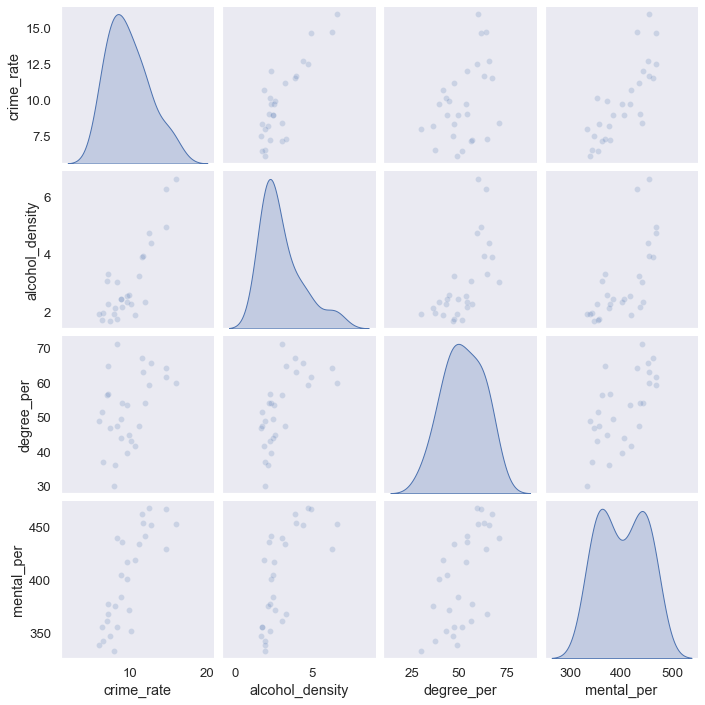

In [88]:
sns.pairplot(model, diag_kind='kde', plot_kws={'alpha': 0.2})

In [89]:
model['lncrime'] = np.log(model.crime_rate)
model['lnalcohol'] = np.log(model.alcohol_density)
model['lndegree'] = np.log(model.degree_per)
model['lnmental'] = np.log(model.mental_per)
#model['lnunemploy'] = np.log(model.unemploy_rate)
#model['lnincome'] = np.log(model.income_ratio)

In [90]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   crime_rate       28 non-null     float64
 1   alcohol_density  28 non-null     float64
 2   degree_per       28 non-null     float64
 3   mental_per       28 non-null     float64
 4   lncrime          28 non-null     float64
 5   lnalcohol        28 non-null     float64
 6   lndegree         28 non-null     float64
 7   lnmental         28 non-null     float64
dtypes: float64(8)
memory usage: 2.0 KB


In [91]:
lnmodel = model.iloc[0:28,4:8]

In [92]:
lnmodel

,lncrime,lnalcohol,lndegree,lnmental
0,1.8700,0.6742,3.6136,5.8362
1,2.2711,0.8474,3.6788,5.9933
2,2.0120,0.5199,3.8480,5.8507
3,2.7722,1.8893,4.0927,6.1161
4,2.1857,0.8917,3.9000,5.9505
5,2.0968,0.7580,3.5863,5.9291
6,2.2729,0.9329,3.9797,6.0344
7,2.5219,1.5553,4.0826,6.1480
8,2.5422,1.4801,4.1836,6.1142
9,2.4856,0.8554,3.9890,6.0916


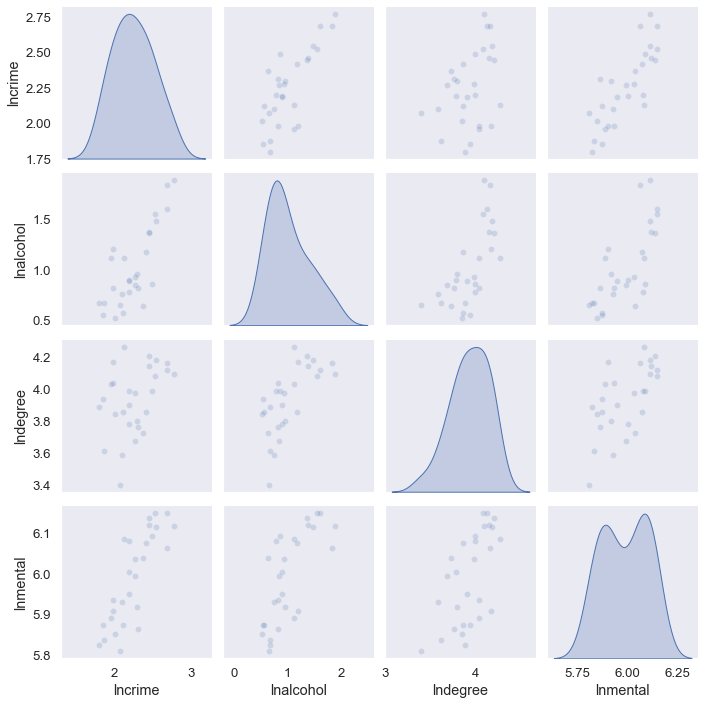

In [93]:
sns.pairplot(lnmodel, diag_kind='kde', plot_kws={'alpha': 0.2})

Text(0.5, 1.0, 'Correlation Matrix')

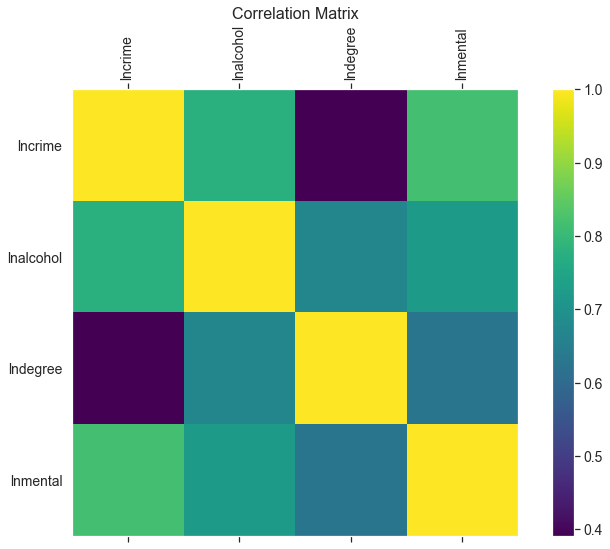

In [94]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(12, 8))
plt.matshow(lnmodel.corr(), fignum=f.number, cmap='viridis')
plt.xticks(range(lnmodel.shape[1]), lnmodel.columns, fontsize=14, rotation=90)
plt.yticks(range(lnmodel.shape[1]), lnmodel.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [95]:
cols_ind=['lnalcohol', 
          'lndegree', 
          'lnmental']
ind_vars = model[cols_ind]

In [96]:
model_3 = sm.OLS(endog=model[['lncrime']], exog=sm.add_constant(ind_vars)).fit()
model_3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lncrime   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     38.31
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           2.61e-09
Time:                        13:33:17   Log-Likelihood:                 22.579
No. Observations:                  28   AIC:                            -37.16
Df Residuals:                      24   BIC:                            -31.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4365      1.673     -3.249      0.003      -8.890      -1.983
lnalcohol      0.3934      0.091      4.302      0.000       0.205       0.582
lndegree      -0.5094      0.148     -3.434      0.002      -0.816      -0.203
lnmental       1.5506      0.301      5.145      0.000       0.929       2.173
==============================================================================
Omnibus:                        1.911   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.716
Skew:                           0.522   Prob(JB):                        0.424
Kurtosis:                       2.383   Cond. No.                         563.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

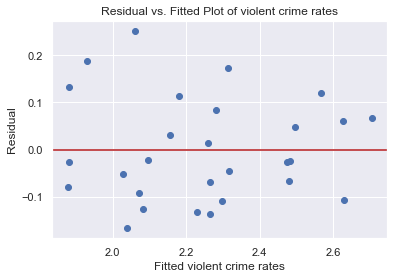

In [97]:
sn.set_theme(style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)
# plot 
plt.scatter(model_3.fittedvalues, model_3.resid)
# adding title and labels
plt.xlabel('Fitted violent crime rates')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of violent crime rates')
plt.axhline(y = 0, color = 'r', linewidth = 2)
plt.show()

### drop a column & log

In [98]:
#cols_ind=['lnalcohol', 
          #'lndegree', 
          #'lnmental']
#ind_vars = model[cols_ind]

In [99]:
#model_4 = sm.OLS(endog=model[['lncrime']], exog=sm.add_constant(ind_vars)).fit()
#model_4.summary() 

In [100]:
#sn.set_theme(style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)
# plot 
#plt.scatter(model_4.fittedvalues, model_4.resid)
# adding title and labels
#plt.xlabel('Fitted violent crime rates')
#plt.ylabel('Residual')
#plt.title('Residual vs. Fitted Plot of violent crime rates')
#plt.axhline(y = 0, color = 'r', linewidth = 2)
#plt.show()

## Clustering

### Standardisation

In [101]:
to_drop = ['lncrime','lnalcohol','lndegree','lnmental']
model.drop(columns=to_drop, inplace=True)

In [102]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   crime_rate       28 non-null     float64
 1   alcohol_density  28 non-null     float64
 2   degree_per       28 non-null     float64
 3   mental_per       28 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


In [103]:
cols=list(model)   
for item in cols:
    max_tmp = np.max(np.array(model[item]))
    min_tmp = np.min(np.array(model[item]))
    if (max_tmp != min_tmp):
        model[item] = model[item].apply(lambda x: (x - min_tmp) / (max_tmp - min_tmp))

In [104]:
model

,crime_rate,alcohol_density,degree_per,mental_per
0,0.0452,0.0569,0.1719,0.0703
1,0.3668,0.1321,0.2324,0.5025
2,0.1446,0.0000,0.4092,0.1075
3,1.0000,1.0000,0.7240,0.8910
4,0.2871,0.1535,0.4697,0.3781
5,0.2111,0.0917,0.1477,0.3178
6,0.3685,0.1744,0.5690,0.6273
7,0.6442,0.6192,0.7094,1.0000
8,0.6699,0.5497,0.8620,0.8847
9,0.5997,0.1359,0.5811,0.8096


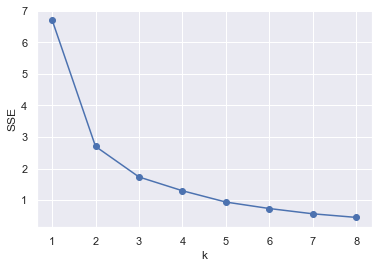

In [105]:
# k-numbers
import pandas as pd  
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  
 
  
SSE = []   
for k in range(1,9):  
    estimator = KMeans(n_clusters=k)    
    estimator.fit(model[['alcohol_density','degree_per','mental_per']])  
    SSE.append(estimator.inertia_)  
X = range(1,9)  
plt.xlabel('k')  
plt.ylabel('SSE')  
plt.plot(X,SSE,'o-')  
plt.show()  

In [106]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # For working with numerical data
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [107]:
num_clusters = 2

### alcohol

In [108]:
to_drop = ['degree_per','mental_per']
data1 = model.drop(columns=to_drop, inplace=False)

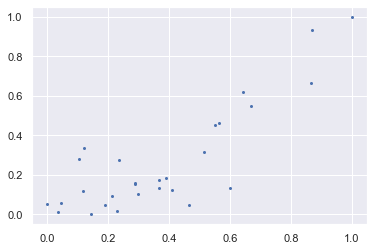

In [109]:
x = data1.iloc[:,0]
y = data1.iloc[:,1]
plt.scatter(x, y,s=4)
plt.show()

all_points_len:  28
k_label_len: 28
0.04515661141954629 0.056866762925892246


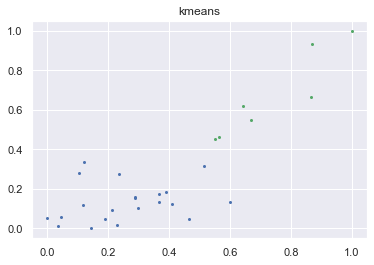

In [110]:
all_points = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
i = 0 
while i < len(x):
    point = [x[i],y[i]]
    all_points.append(point)
    i+=1

kmeans = KMeans(n_clusters=2).fit(all_points)
plt.title('kmeans')
print('all_points_len: ',len(all_points))
print('k_label_len:',len(kmeans.labels_))
print(all_points[0][0],all_points[0][1])
for id, label in enumerate(kmeans.labels_):
    plt.scatter(all_points[id][0], all_points[id][1], color = colors[label],marker='o',s=4)
plt.show()

### degree

In [111]:
to_drop = ['alcohol_density','mental_per']
data2 = model.drop(columns=to_drop, inplace=False)

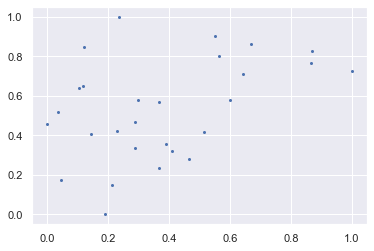

In [112]:
x = data2.iloc[:,0]
y = data2.iloc[:,1]
plt.scatter(x, y,s=4)

plt.show()

all_points_len:  28
k_label_len: 28
0.04515661141954629 0.17191283292978213


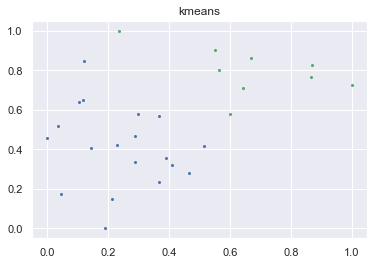

In [113]:
all_points = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
i = 0 
while i < len(x):
    point = [x[i],y[i]]
    all_points.append(point)
    i+=1

kmeans = KMeans(n_clusters=2).fit(all_points)
plt.title('kmeans')
print('all_points_len: ',len(all_points))
print('k_label_len:',len(kmeans.labels_))
print(all_points[0][0],all_points[0][1])
for id, label in enumerate(kmeans.labels_):
    plt.scatter(all_points[id][0], all_points[id][1], color = colors[label],marker='o',s=4)
plt.show()

### mental health

In [114]:
to_drop = ['alcohol_density','degree_per']
data3 = model.drop(columns=to_drop, inplace=False)

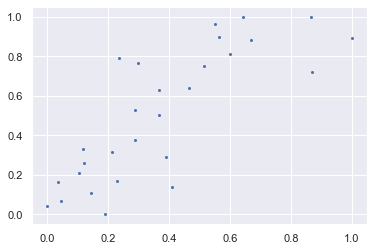

In [115]:
x = data3.iloc[:,0]
y = data3.iloc[:,1]
plt.scatter(x, y,s=4)

plt.show()

all_points_len:  28
k_label_len: 28
0.04515661141954629 0.07027648512743365


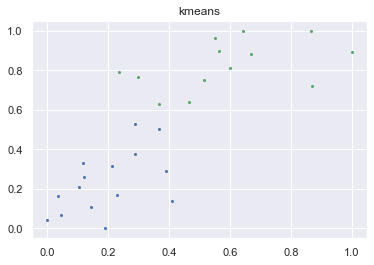

In [116]:
all_points = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
i = 0 
while i < len(x):
    point = [x[i],y[i]]
    all_points.append(point)
    i+=1

kmeans = KMeans(n_clusters=2).fit(all_points)
plt.title('kmeans')
print('all_points_len: ',len(all_points))
print('k_label_len:',len(kmeans.labels_))
print(all_points[0][0],all_points[0][1])
for id, label in enumerate(kmeans.labels_):
    plt.scatter(all_points[id][0], all_points[id][1], color = colors[label],marker='o',s=4)
plt.show()

In [117]:
# PERFORM CLUSTERING

# This line performs the k-means clustering:
kmeans_output = sklc.KMeans(n_clusters=num_clusters, n_init=1).fit(data1)

#And have a look as a sanity check
print(kmeans_output) 

KMeans(n_clusters=2, n_init=1)


In [118]:
# This line creates a list giving the final cluster number of each point:
clustering_ids_kmeans = kmeans_output.labels_

#Which we can now look at
print(clustering_ids_kmeans)

[1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1]


In [119]:
#That's just an ordered list of labels, which could be more helpful if they were attached to the data points. 

# These lines add the cluster IDs to the original data and save the data with these added cluster IDs.
complete_data_with_clusters = np.hstack((model,np.array([clustering_ids_kmeans]).T))

#Have a look at the result:
print(complete_data_with_clusters)

[[0.04515661 0.05686676 0.17191283 0.07027649 1.        ]
 [0.36681157 0.13211192 0.23244552 0.50245221 1.        ]
 [0.14458778 0.         0.40920097 0.10754836 1.        ]
 [1.         1.         0.72397094 0.89096233 0.        ]
 [0.2871166  0.15351237 0.46973366 0.37805074 1.        ]
 [0.21110643 0.09165109 0.14769976 0.3177646  1.        ]
 [0.36851832 0.17435031 0.56900726 0.62730861 1.        ]
 [0.64423723 0.61924295 0.7094431  1.         0.        ]
 [0.66986487 0.54966603 0.86198547 0.88469917 0.        ]
 [0.59971512 0.13589776 0.5811138  0.80955248 1.        ]
 [0.         0.05409063 0.45520581 0.04121105 1.        ]
 [0.19061915 0.04937919 0.         0.         1.        ]
 [0.40884106 0.12101272 0.31961259 0.14110324 1.        ]
 [0.39015598 0.18636511 0.3559322  0.28793627 1.        ]
 [0.86687573 0.66398514 0.76755448 0.99827882 0.        ]
 [0.86939858 0.93070764 0.82808717 0.71834991 0.        ]
 [0.10429819 0.27900283 0.63922518 0.21111262 1.        ]
 [0.55214516 0

In [120]:
#Now, it would be handy to separate out our data so we have a list of the points within each cluster.  

# The loop below creates a separate data array for each cluster, and puts these arrays together in a list:
data_by_cluster = []

for i in range(num_clusters):
    
    this_data = []
    
    for row in complete_data_with_clusters:
        
        if row[-1] == i:
            this_data.append(row)
    
    this_data = np.array(this_data)
    
    data_by_cluster.append(this_data)
    
#Which gives the following:
data_by_cluster

[array([[1.        , 1.        , 0.72397094, 0.89096233, 0.        ],
        [0.64423723, 0.61924295, 0.7094431 , 1.        , 0.        ],
        [0.66986487, 0.54966603, 0.86198547, 0.88469917, 0.        ],
        [0.86687573, 0.66398514, 0.76755448, 0.99827882, 0.        ],
        [0.86939858, 0.93070764, 0.82808717, 0.71834991, 0.        ],
        [0.55214516, 0.45289183, 0.90072639, 0.96123047, 0.        ],
        [0.56532544, 0.4602719 , 0.79903148, 0.89998058, 0.        ]]),
 array([[0.04515661, 0.05686676, 0.17191283, 0.07027649, 1.        ],
        [0.36681157, 0.13211192, 0.23244552, 0.50245221, 1.        ],
        [0.14458778, 0.        , 0.40920097, 0.10754836, 1.        ],
        [0.2871166 , 0.15351237, 0.46973366, 0.37805074, 1.        ],
        [0.21110643, 0.09165109, 0.14769976, 0.3177646 , 1.        ],
        [0.36851832, 0.17435031, 0.56900726, 0.62730861, 1.        ],
        [0.59971512, 0.13589776, 0.5811138 , 0.80955248, 1.        ],
        [0.       

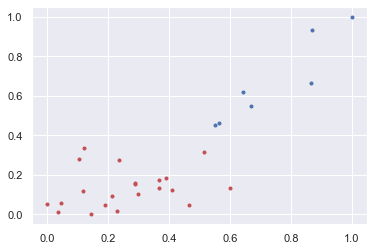

In [121]:
#Lovely! Now let's have a look at those clusters:
# FIGURES 1-N : SEPARATE CLUSTER PLOTS

# This is a list of colours to differentiate each cluster.
color_list = ['b','r','g','m','c','k','y']

# This loop goes through each cluster, plots it and saves it:
for i in range(num_clusters):
    
    #plt.figure(i+1,figsize=(figure_width,figure_height))
    #setup_figure()
    #plt.title(fig_title + ' - Cluster ' + str(i),fontsize=title_fontsize)
    
    x_values = data_by_cluster[i][:,0]
    y_values = data_by_cluster[i][:,1]
    
    plt.plot(x_values,y_values,color_list[i % num_clusters] + '.')